In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\Lenovo\Python NareshIT\Data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box Plot**

- It is used to detect outliers
- It has min q1 q2 q3 and max value
- Inside it red line represents median which 50 percentile of data

**Outlier**

- Very very hige or small observations
- Which pull the data in any side of the distribution
- Mild outliers
    - q1-1.5*IQR and q3+1.5IQR
- Strong outliers
    - q1-3IQR and q3+3IQR
- IQR: inter quartile range
    - IQR=Q3-Q1
- Q1=25p  Q2=50p  Q3=75p

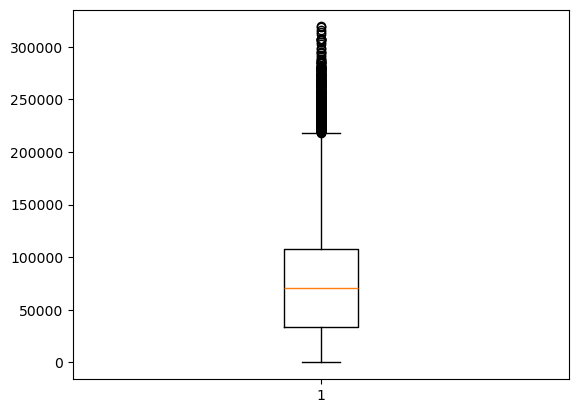

In [4]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

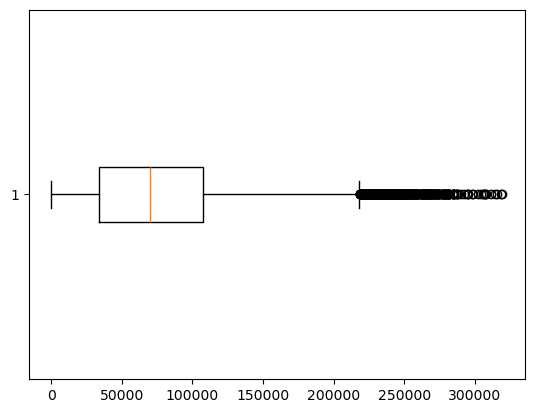

In [6]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

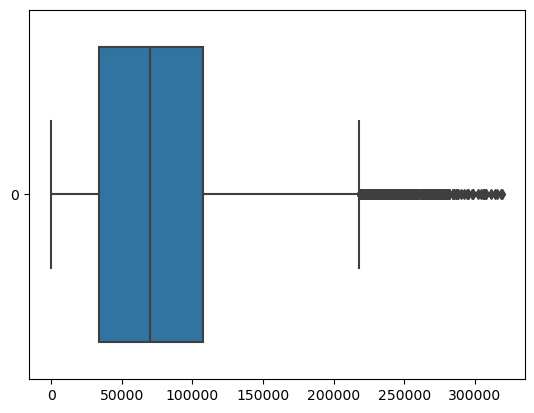

In [50]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')
plt.show()

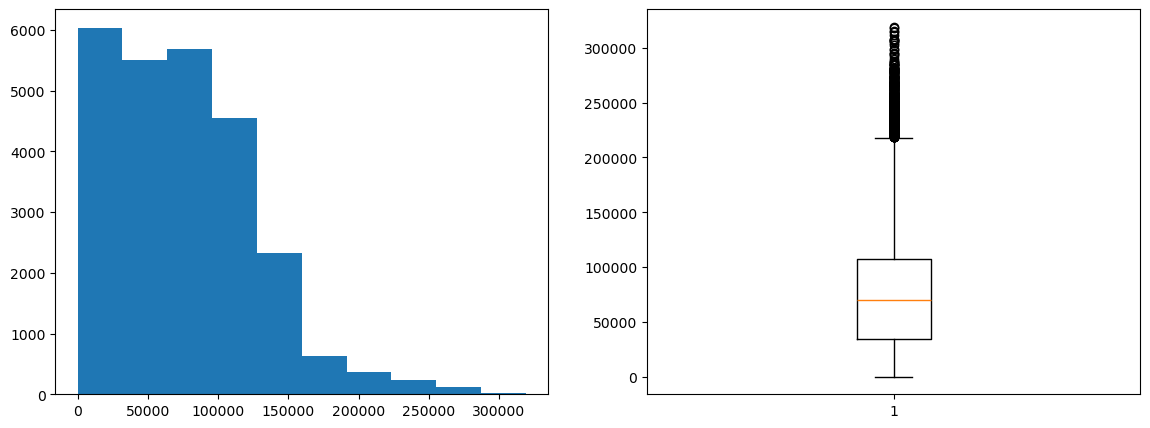

In [20]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are available less than q1-1.5*IQR and > q3+1.5*IQR
- Step-1:
    - Calculate q1,q3,IQR=q3-q1
- Step-2:
    - Calculate Lower bound(BD)= q1-1.5*IQR and UB= q3+1.5*IQR
- Step-3:
    - con1=visa_df['prevailing_wage']<LB
    - con2=visa_df['prevailing_wage']>UB
    - Apply or operator & get outliers data

In [9]:
q1=np.percentile(visa_df['prevailing_wage'],25)
q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data = visa_df[con1 | con2]
len(outliers_data)

427

**Non Outliers data**

In [11]:
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB

non_outliers_data = visa_df[con1 & con2]
len(non_outliers_data)

25053

In [12]:
25053+427

25480

**Histogram & Box plot for non_outliers_data**

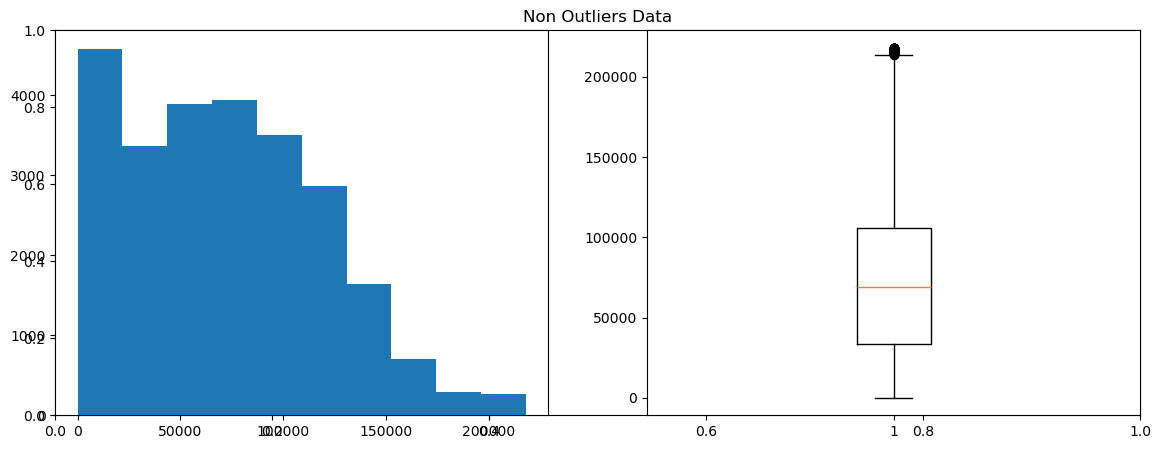

In [29]:
plt.figure(figsize=(14,5))
plt.title('Non Outliers Data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**Comparing Total data with non_outliers_data**

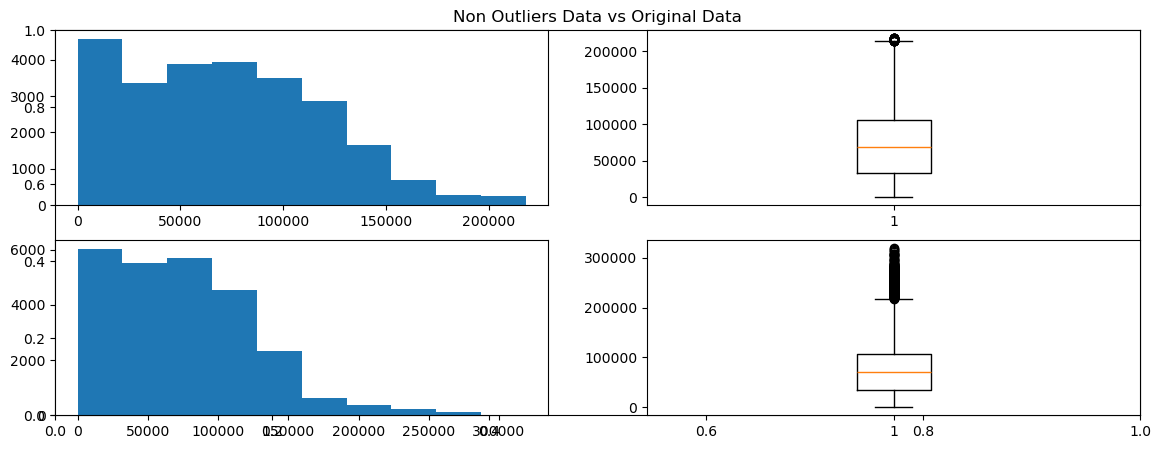

In [27]:
plt.figure(figsize=(14,5)) # 18 units in x-axis & 5 units in y-axis
plt.title('Non Outliers Data vs Original Data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage']) #25053

plt.subplot(2,2,3).hist(visa_df['prevailing_wage']) #25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage']) # 25480
plt.show()

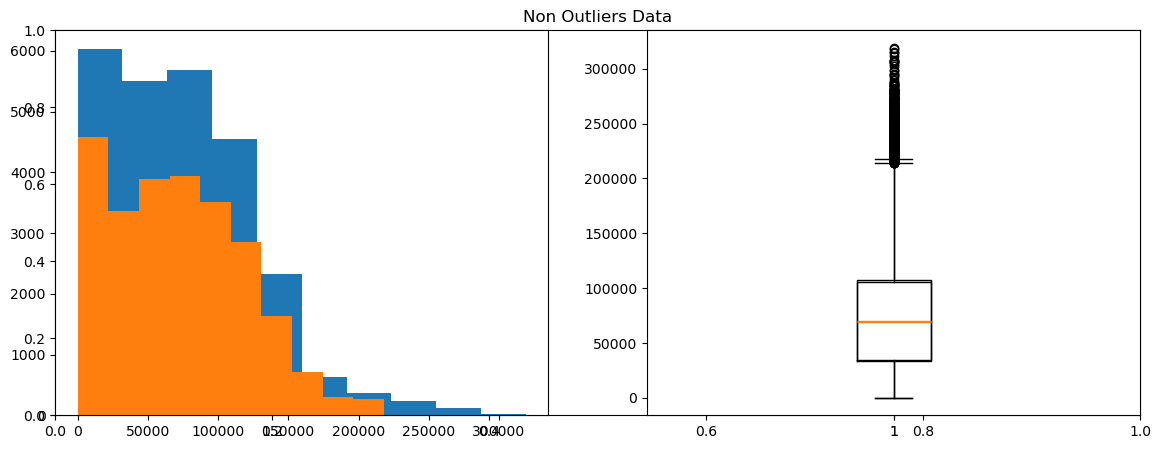

In [30]:
plt.figure(figsize=(14,5))
plt.title('Non Outliers Data')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**How to deal the outliers**

**Method-1: Drop the outliers**
    
- It is not a good idea
- When you drop the outliers the data will loss
- Eg: here we are dropping 427 rows i.e., 1.7% data will loss
- Here it is fine because less %

**Method-2 : Fill with median value**

- wkt outliers does not affect the median
- So we can fill outliers by median
        
**Method-3 : Cap the values with q1 and q3**

- All < LB values replace by q1 or LB  
- All >UB values can be replaced by q3 or UB

**Fill with median**

- Create empty list
- Calculate median value: visa_df['prevailing_wage'].median
- Iterate the visa_df['prevailing_wage'].values
- If each value <LB and >UB the append with median value
- else append i value

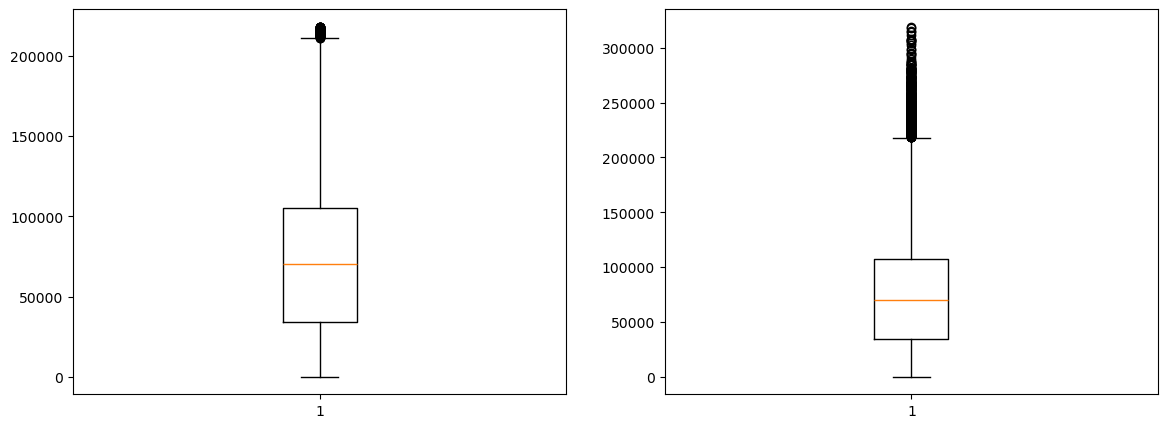

In [38]:
q1=np.percentile(visa_df['prevailing_wage'],25)
q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR

list_val=[]
median_val = visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage'].values:
    if i< LB or i>UB:
        list_val.append(median_val)
    else:
        list_val.append(i)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=list_val

plt.figure(figsize=(14,5))
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**

- It will use for binary condition
- It has 3 arguments:
    - Condition
    - Value1 if condition is True
    - Value2 if condition is False

In [41]:
d={'sub':['DS','ML','CS'],
  'marks':[100,150,20]}
data=pd.DataFrame(d)
data

,sub,marks
0,DS,100
1,ML,150
2,CS,20


In [43]:
# Marks replace with 1 when value >100 else same value
con=data['marks']>100
l=np.where(con,1,data['marks'])
# if condition is True then replace with 1 otherwise data['marks']
l

array([100,   1,  20], dtype=int64)

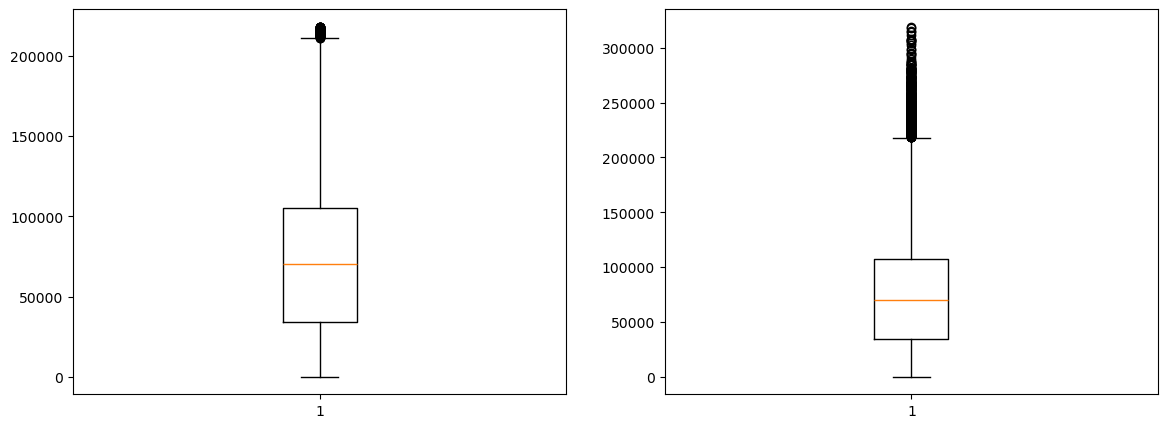

In [51]:
con1=visa_df['prevailing_wage']<LB 
con2=visa_df['prevailing_wage']>UB
con=con1 | con2
median_val = visa_df['prevailing_wage'].median()
l=np.where(con,median_val,visa_df['prevailing_wage'])

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=list_val

plt.figure(figsize=(14,5))
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()